In [45]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\rats\\cohort1"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/cohort1"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["C214", "C215", "C220", "C221", "C223"]
# ANIMAL_IDS = ["C222"]

# "C222",
# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
date_min = "2023-08-15"
# few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [47]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)
trials_df.loc[
    trials_df["cpoke_dur"] < 0, "cpoke_dur"
] = pd.NA  # todo- add to create trials df

[2023-08-18 13:32:11,192][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 4 sessions for C214 between 2023-08-15 and 2023-08-18
fetched 4 sessions for C215 between 2023-08-15 and 2023-08-18
fetched 3 sessions for C220 between 2023-08-15 and 2023-08-17
fetched 3 sessions for C221 between 2023-08-15 and 2023-08-17
fetched 3 sessions for C223 between 2023-08-15 and 2023-08-17


In [48]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making C223_2023-08-17_day_summary
making C214_2023-08-18_day_summary
making C215_2023-08-18_day_summary


In [49]:
print(
    trials_df.query("date == @today")
    .groupby(["animal_id", "date"])
    .give_type_imp.unique()
)

animal_id  date      
C214       2023-08-18    [water_and_light, light]
C215       2023-08-18    [water_and_light, light]
Name: give_type_imp, dtype: object


In [50]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [51]:
# LOAD IN DAYS DATA
days_df = create_days_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
)
f_name = "C2s_days_df.csv"

days_df.to_csv(DATA_PATH / f_name, index=False)


# days_df = lazy_load_days_summary_df(
#     date_min=date_min,
#     date_max=date_max,
#     animal_ids=ANIMAL_IDS,
#     save_dir=DATA_PATH,
#     f_name=f_name,
#     save_out=True,
# )

# days_df = pd.read_csv(DATA_PATH / f_name)

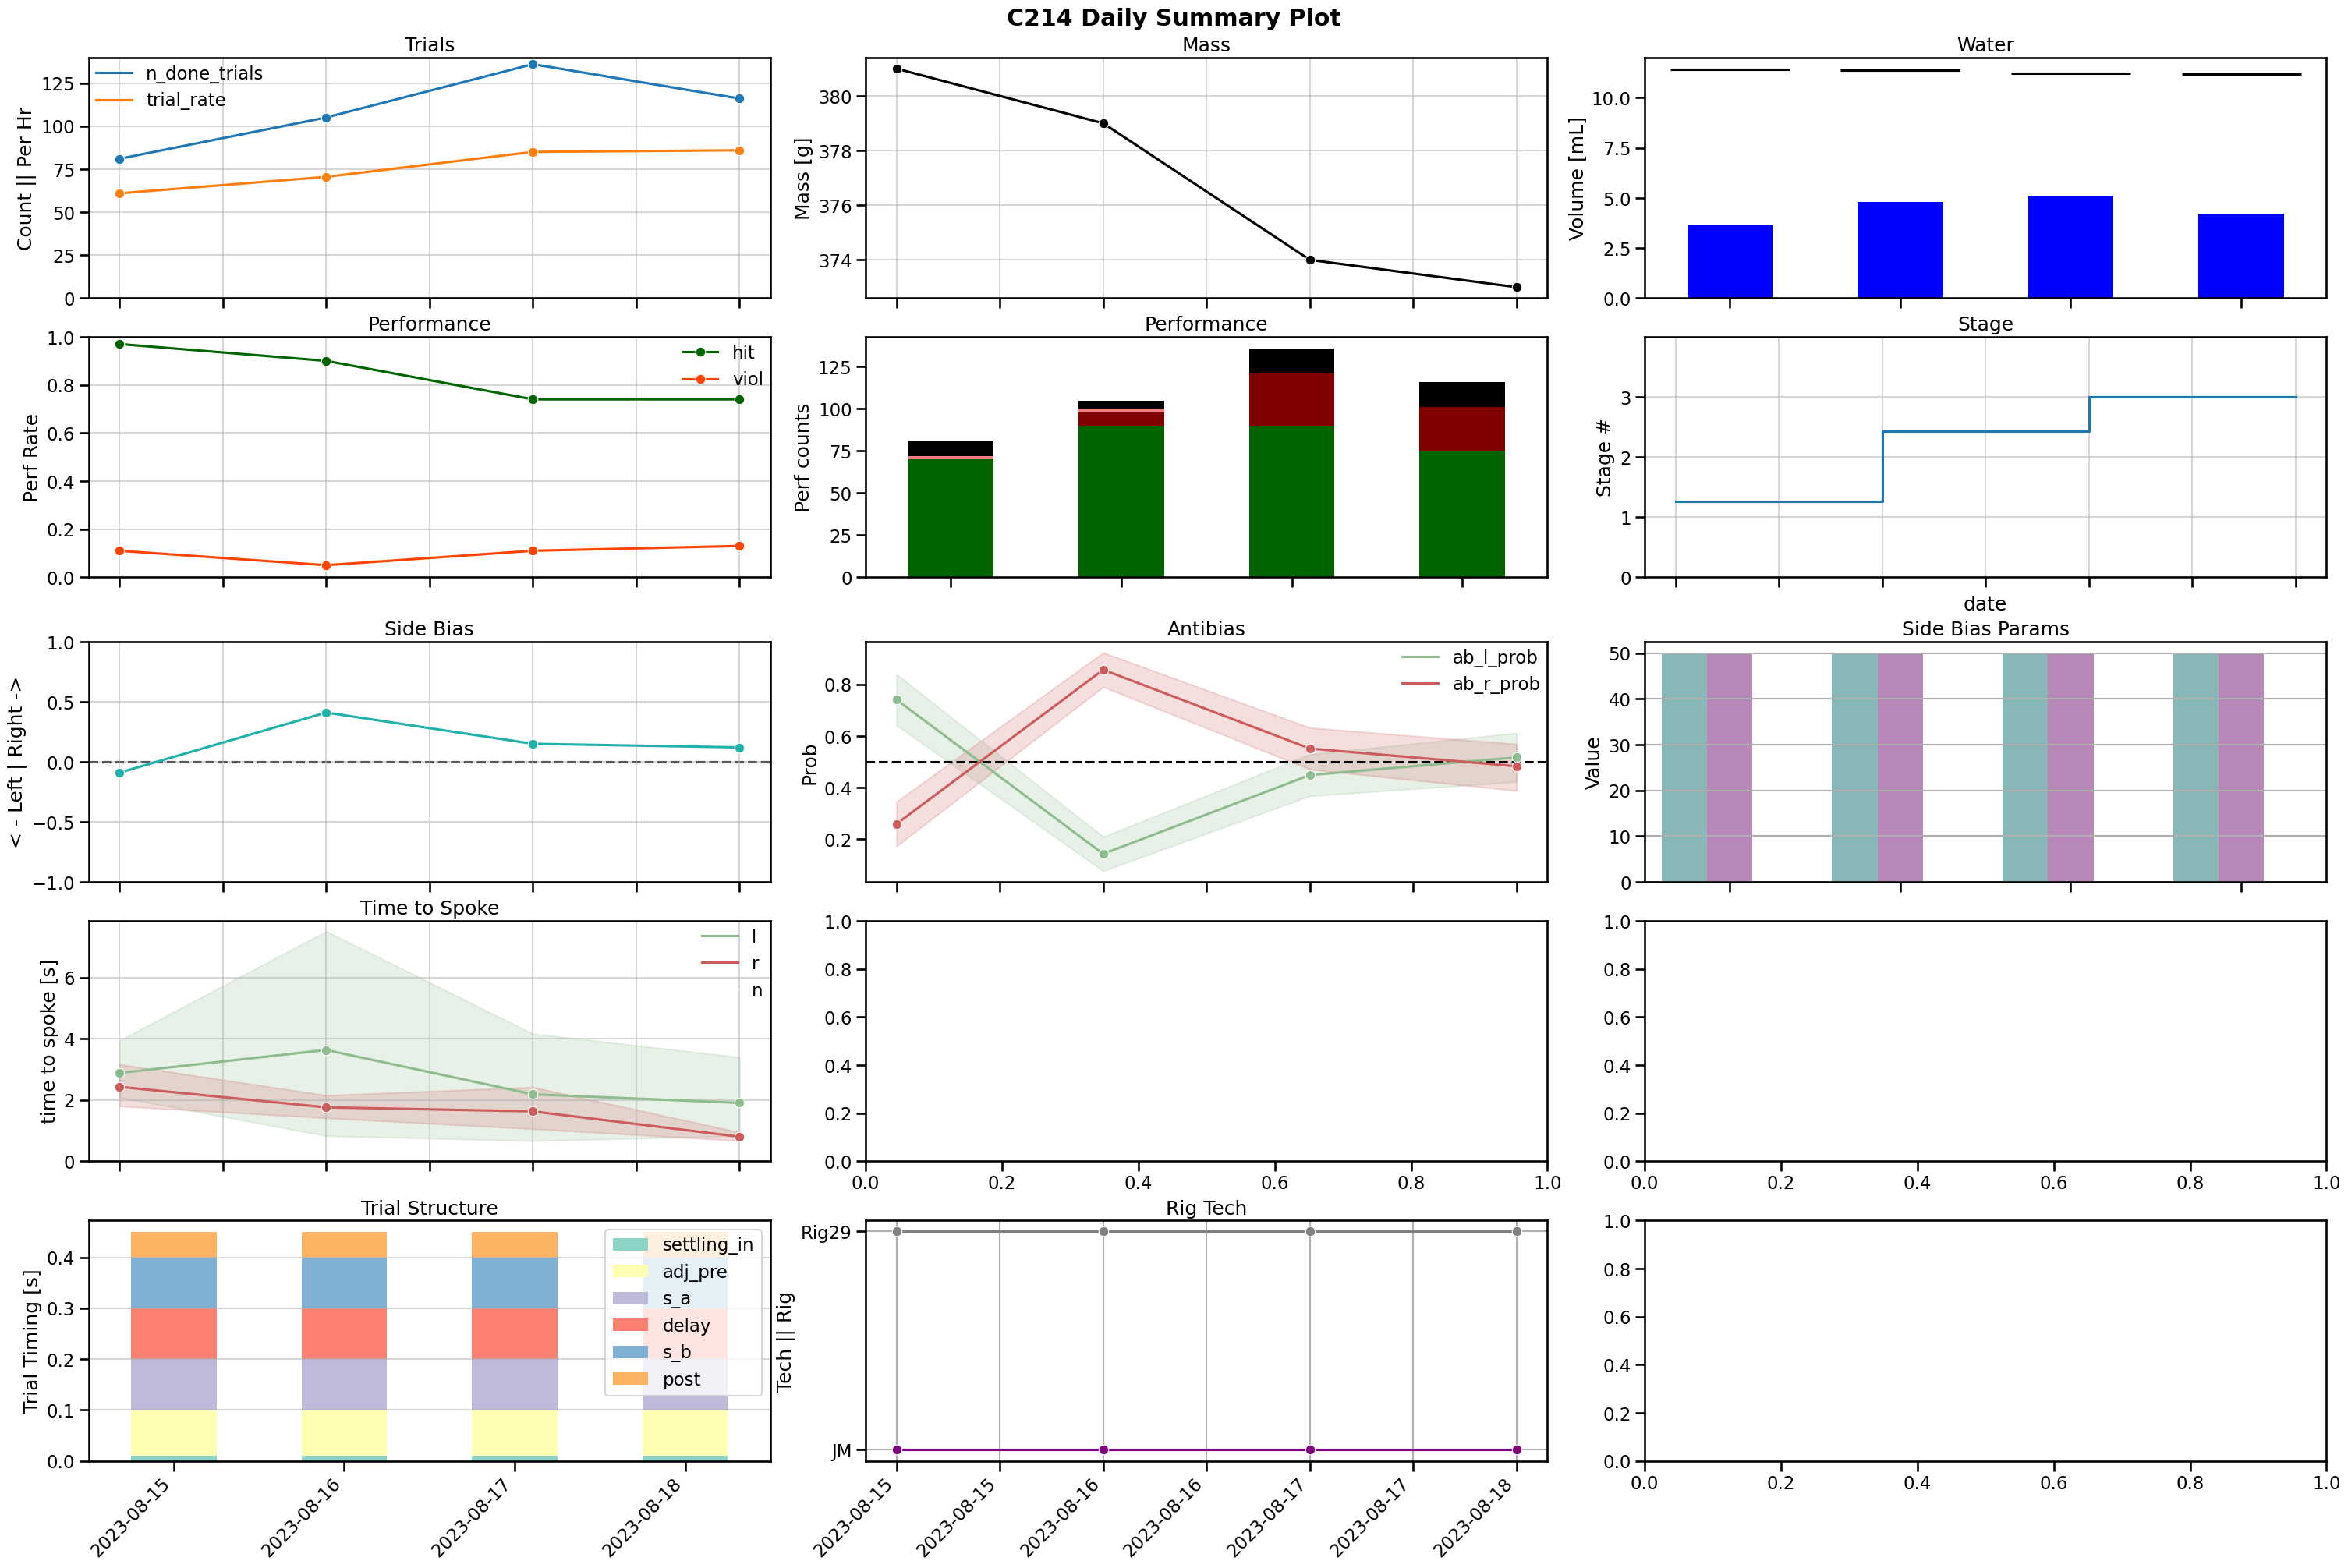

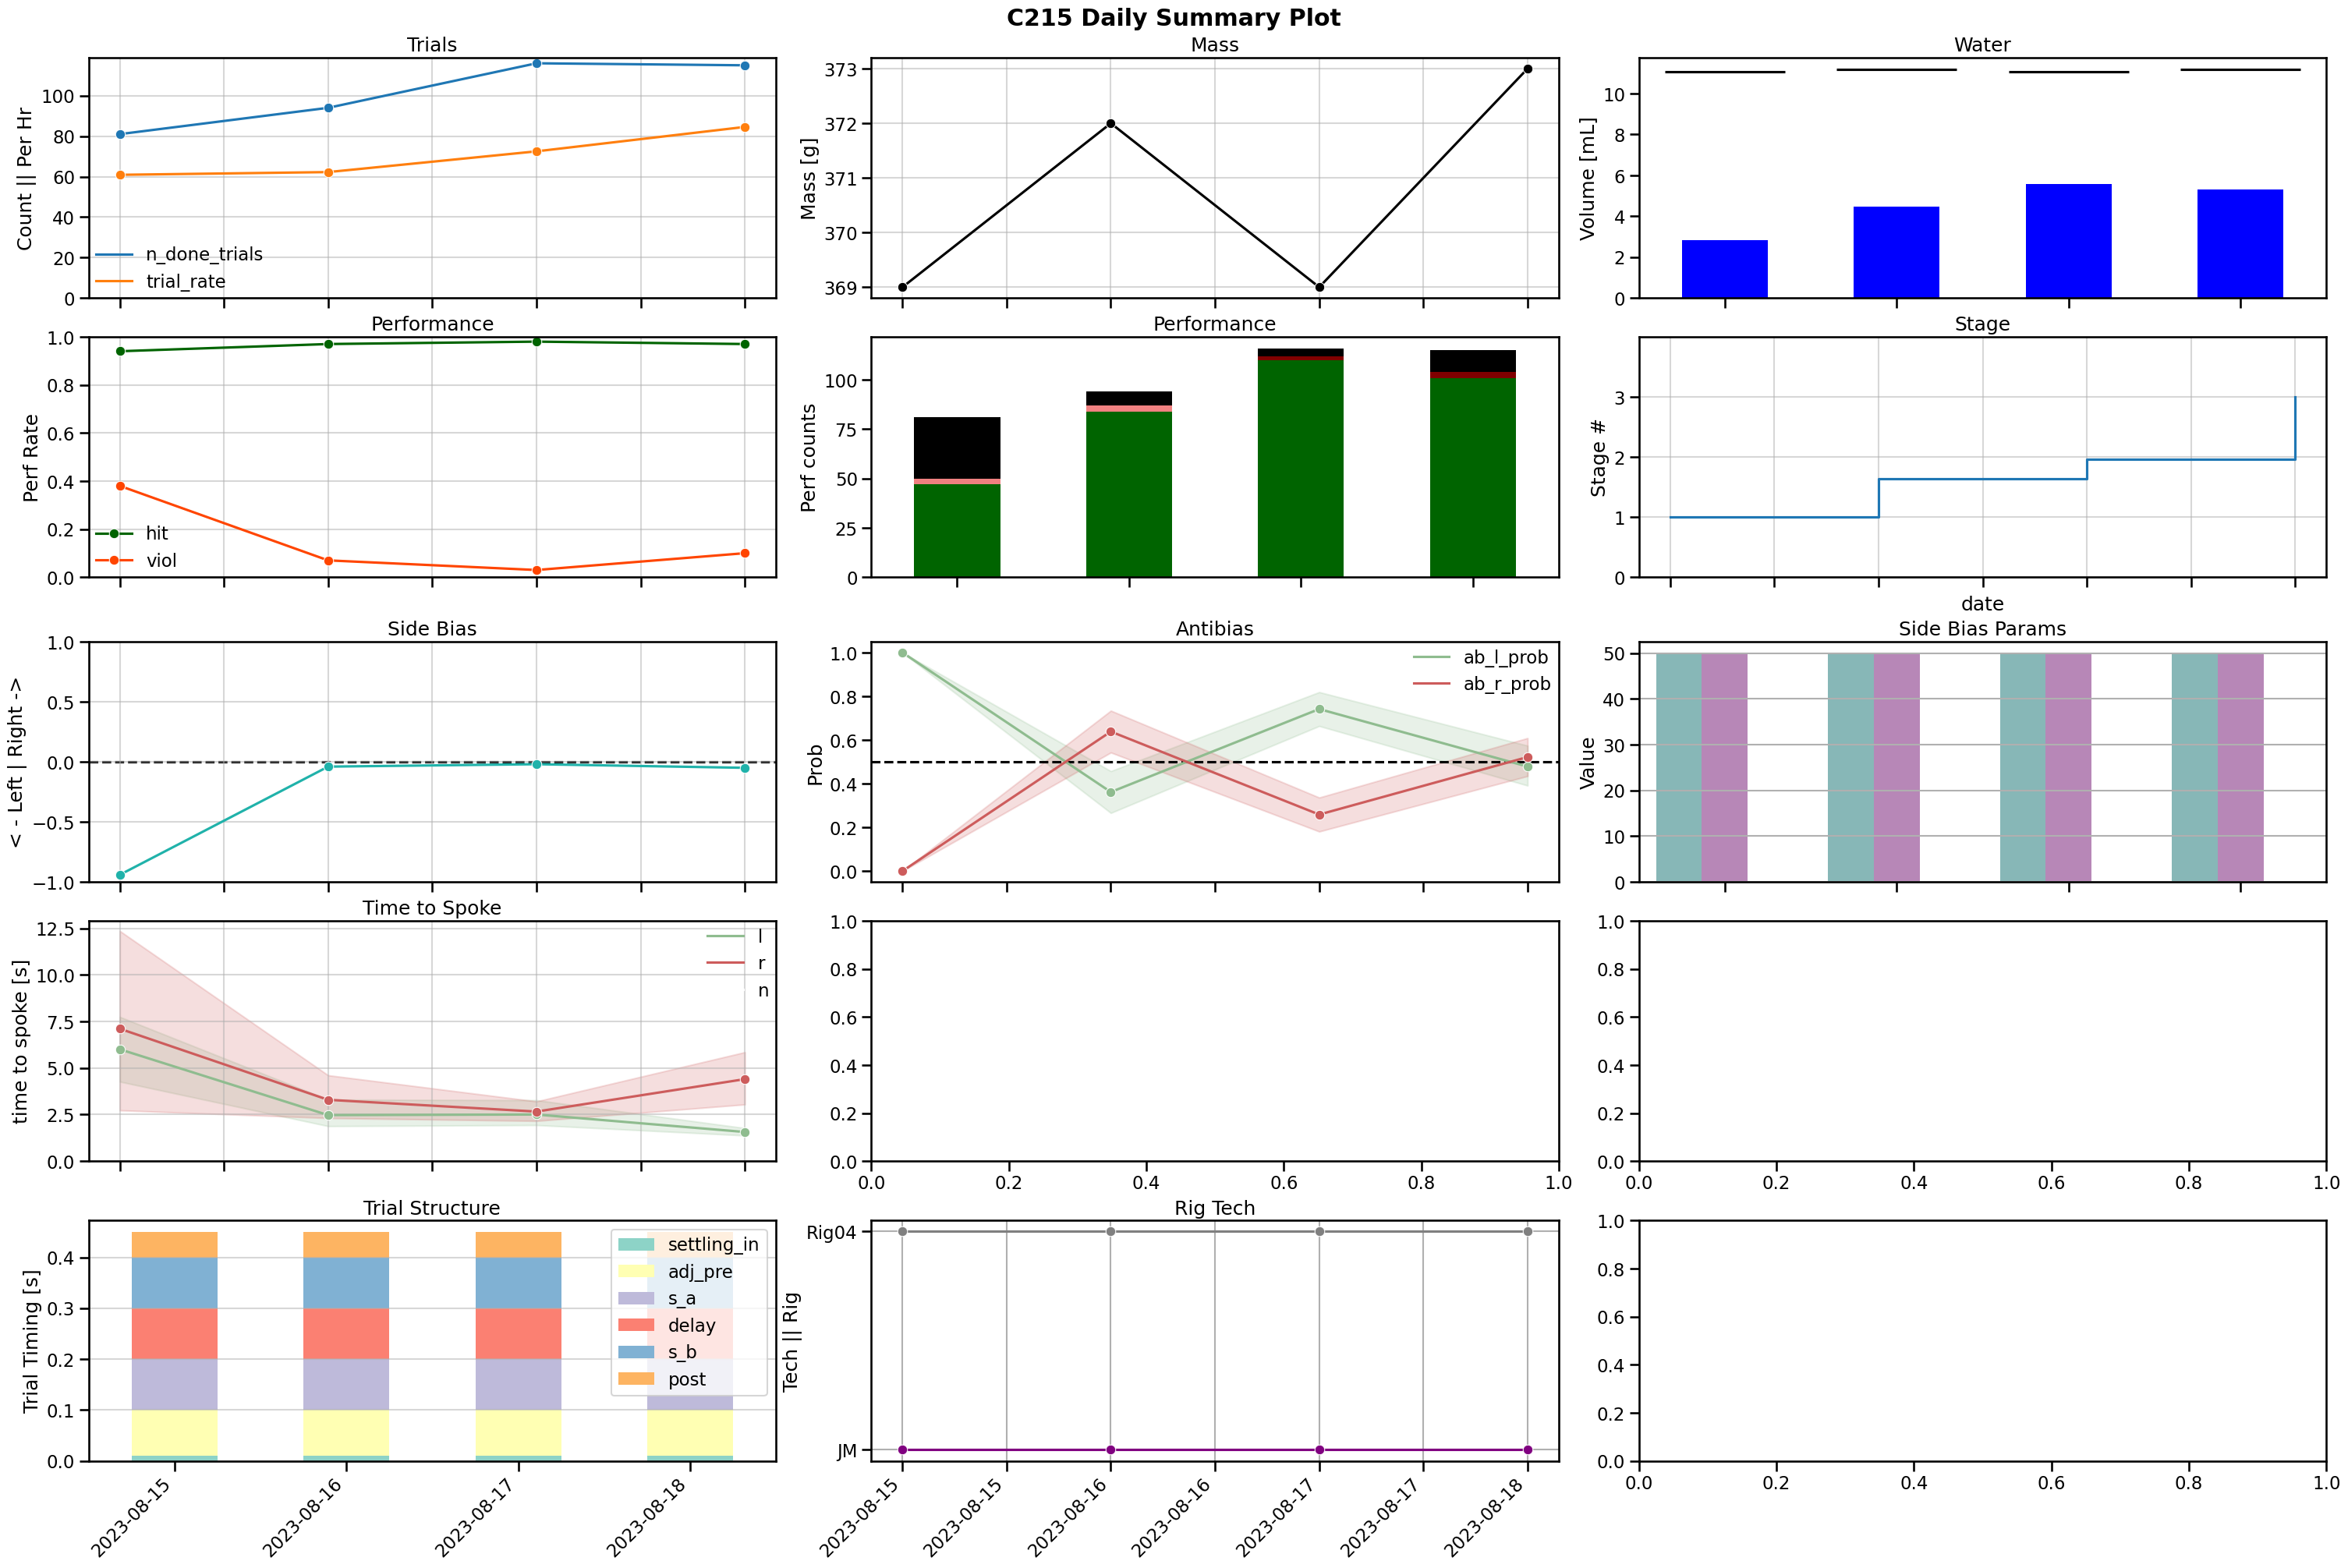

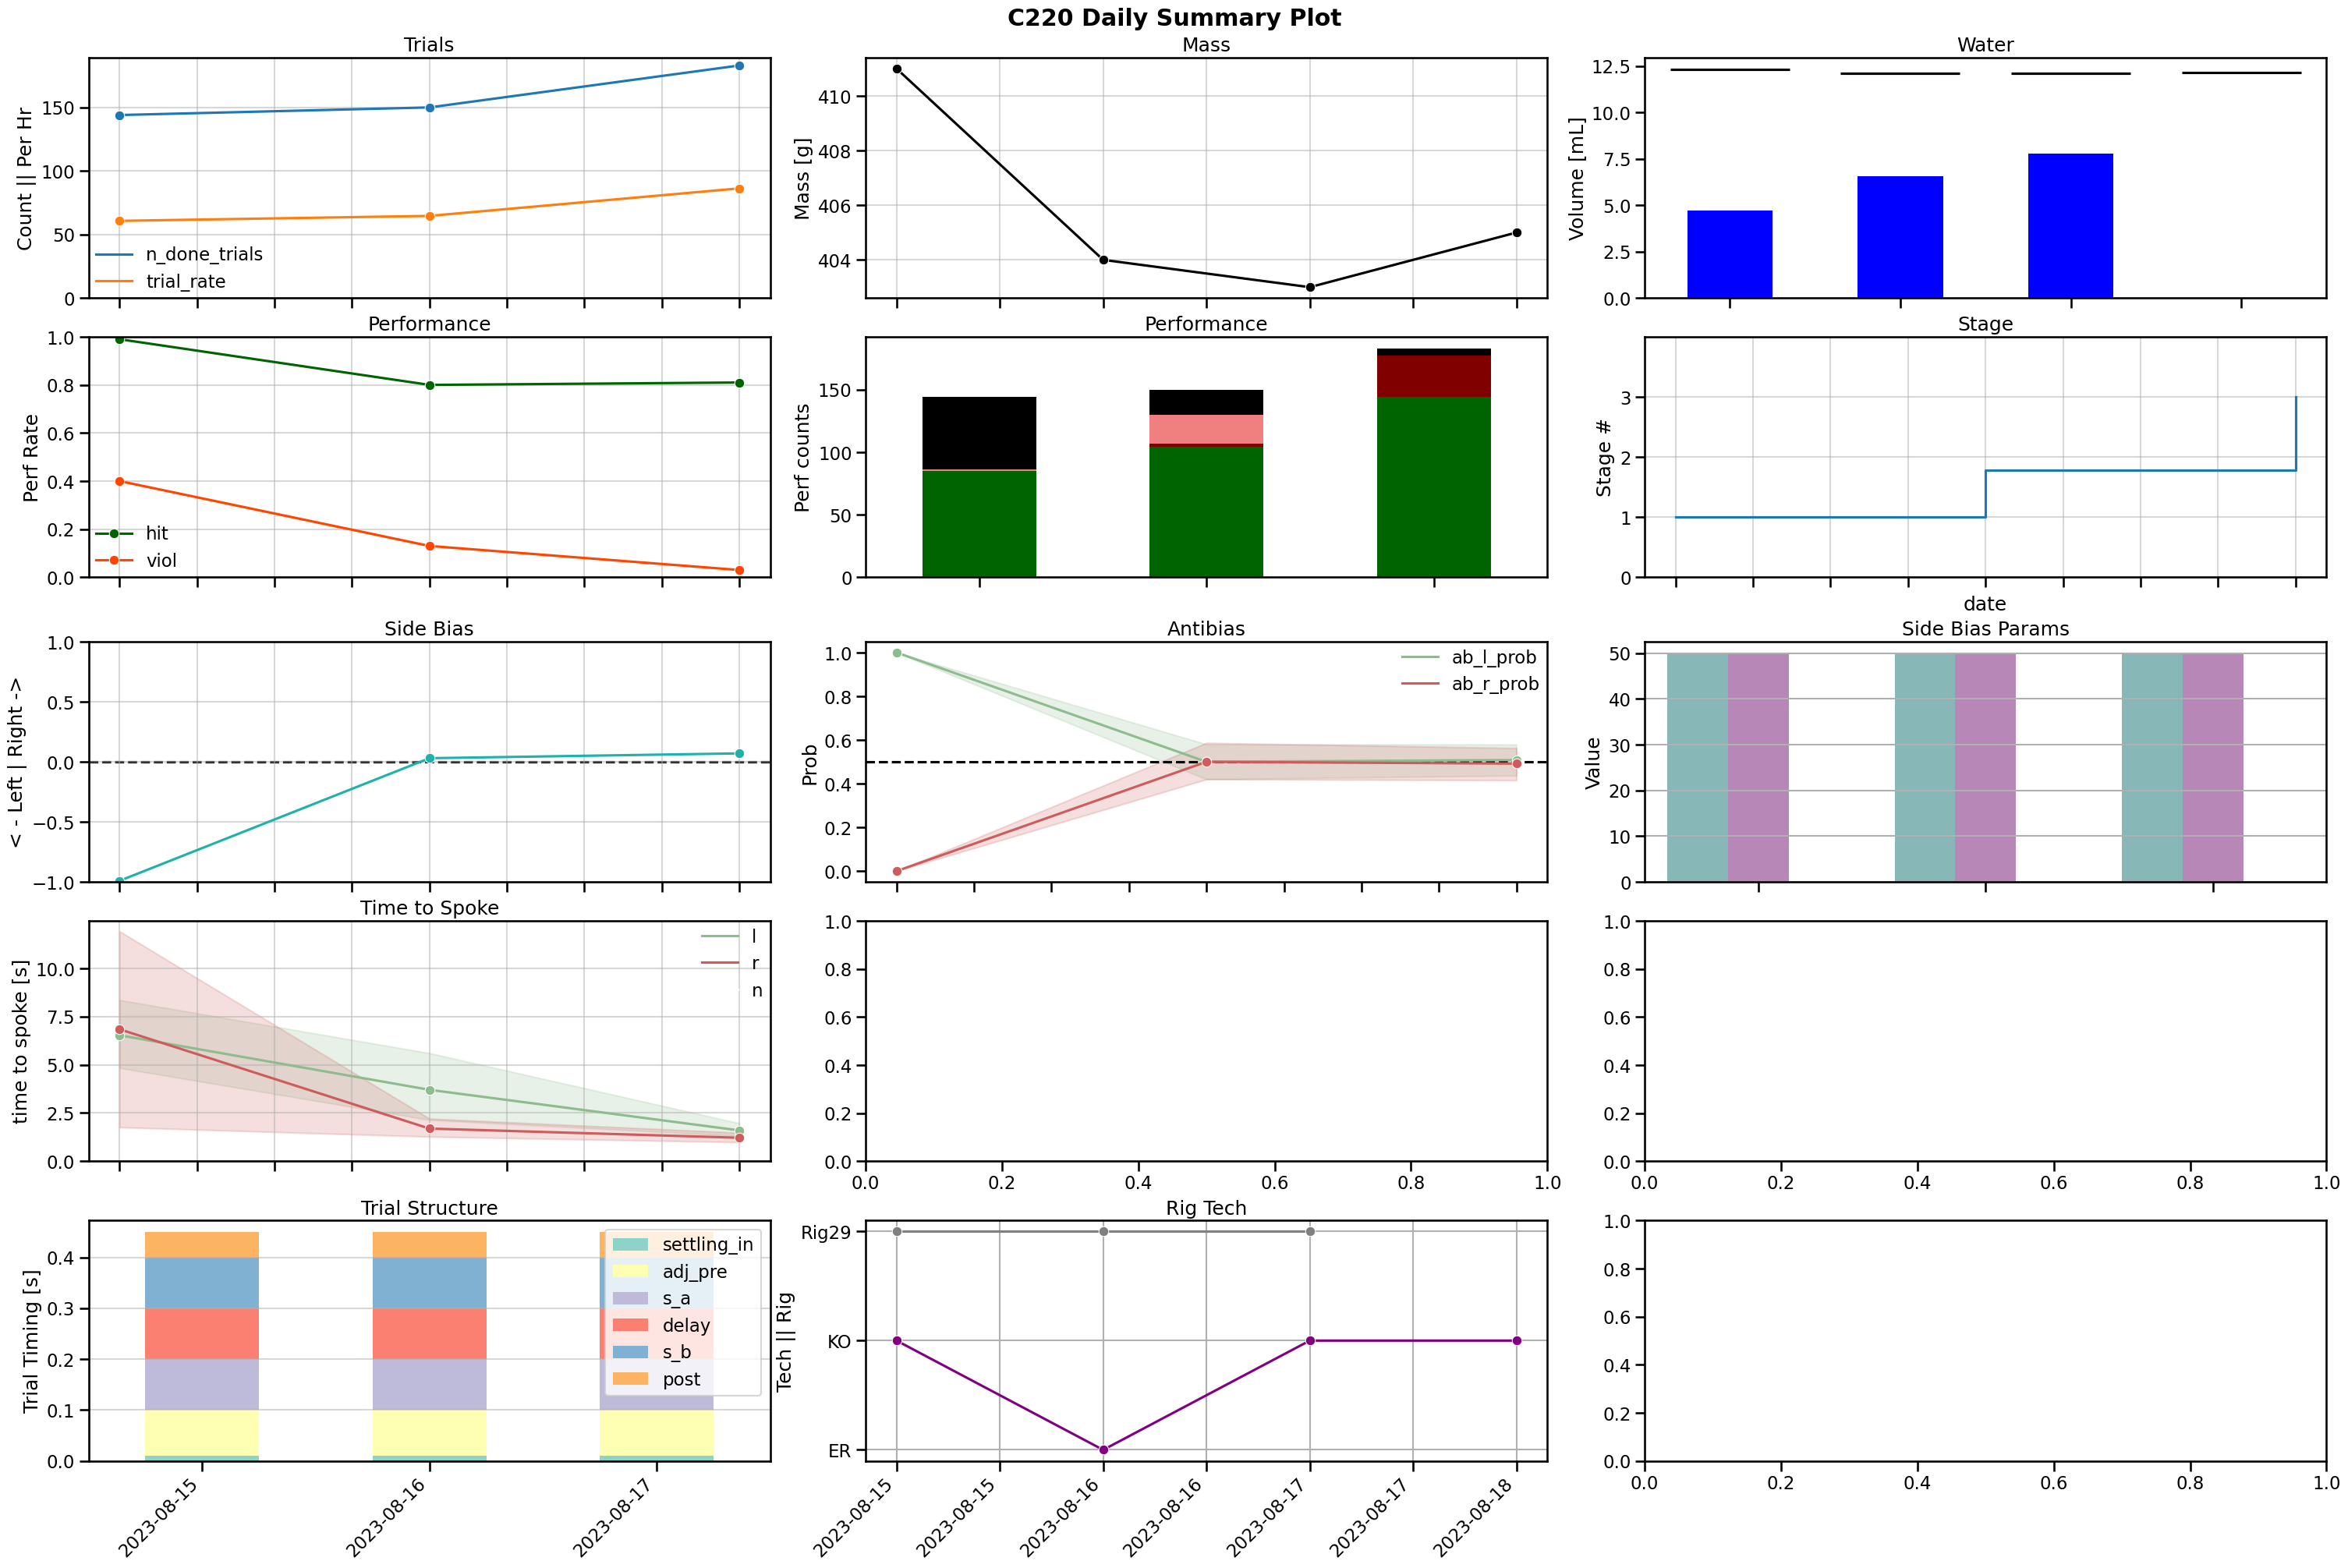

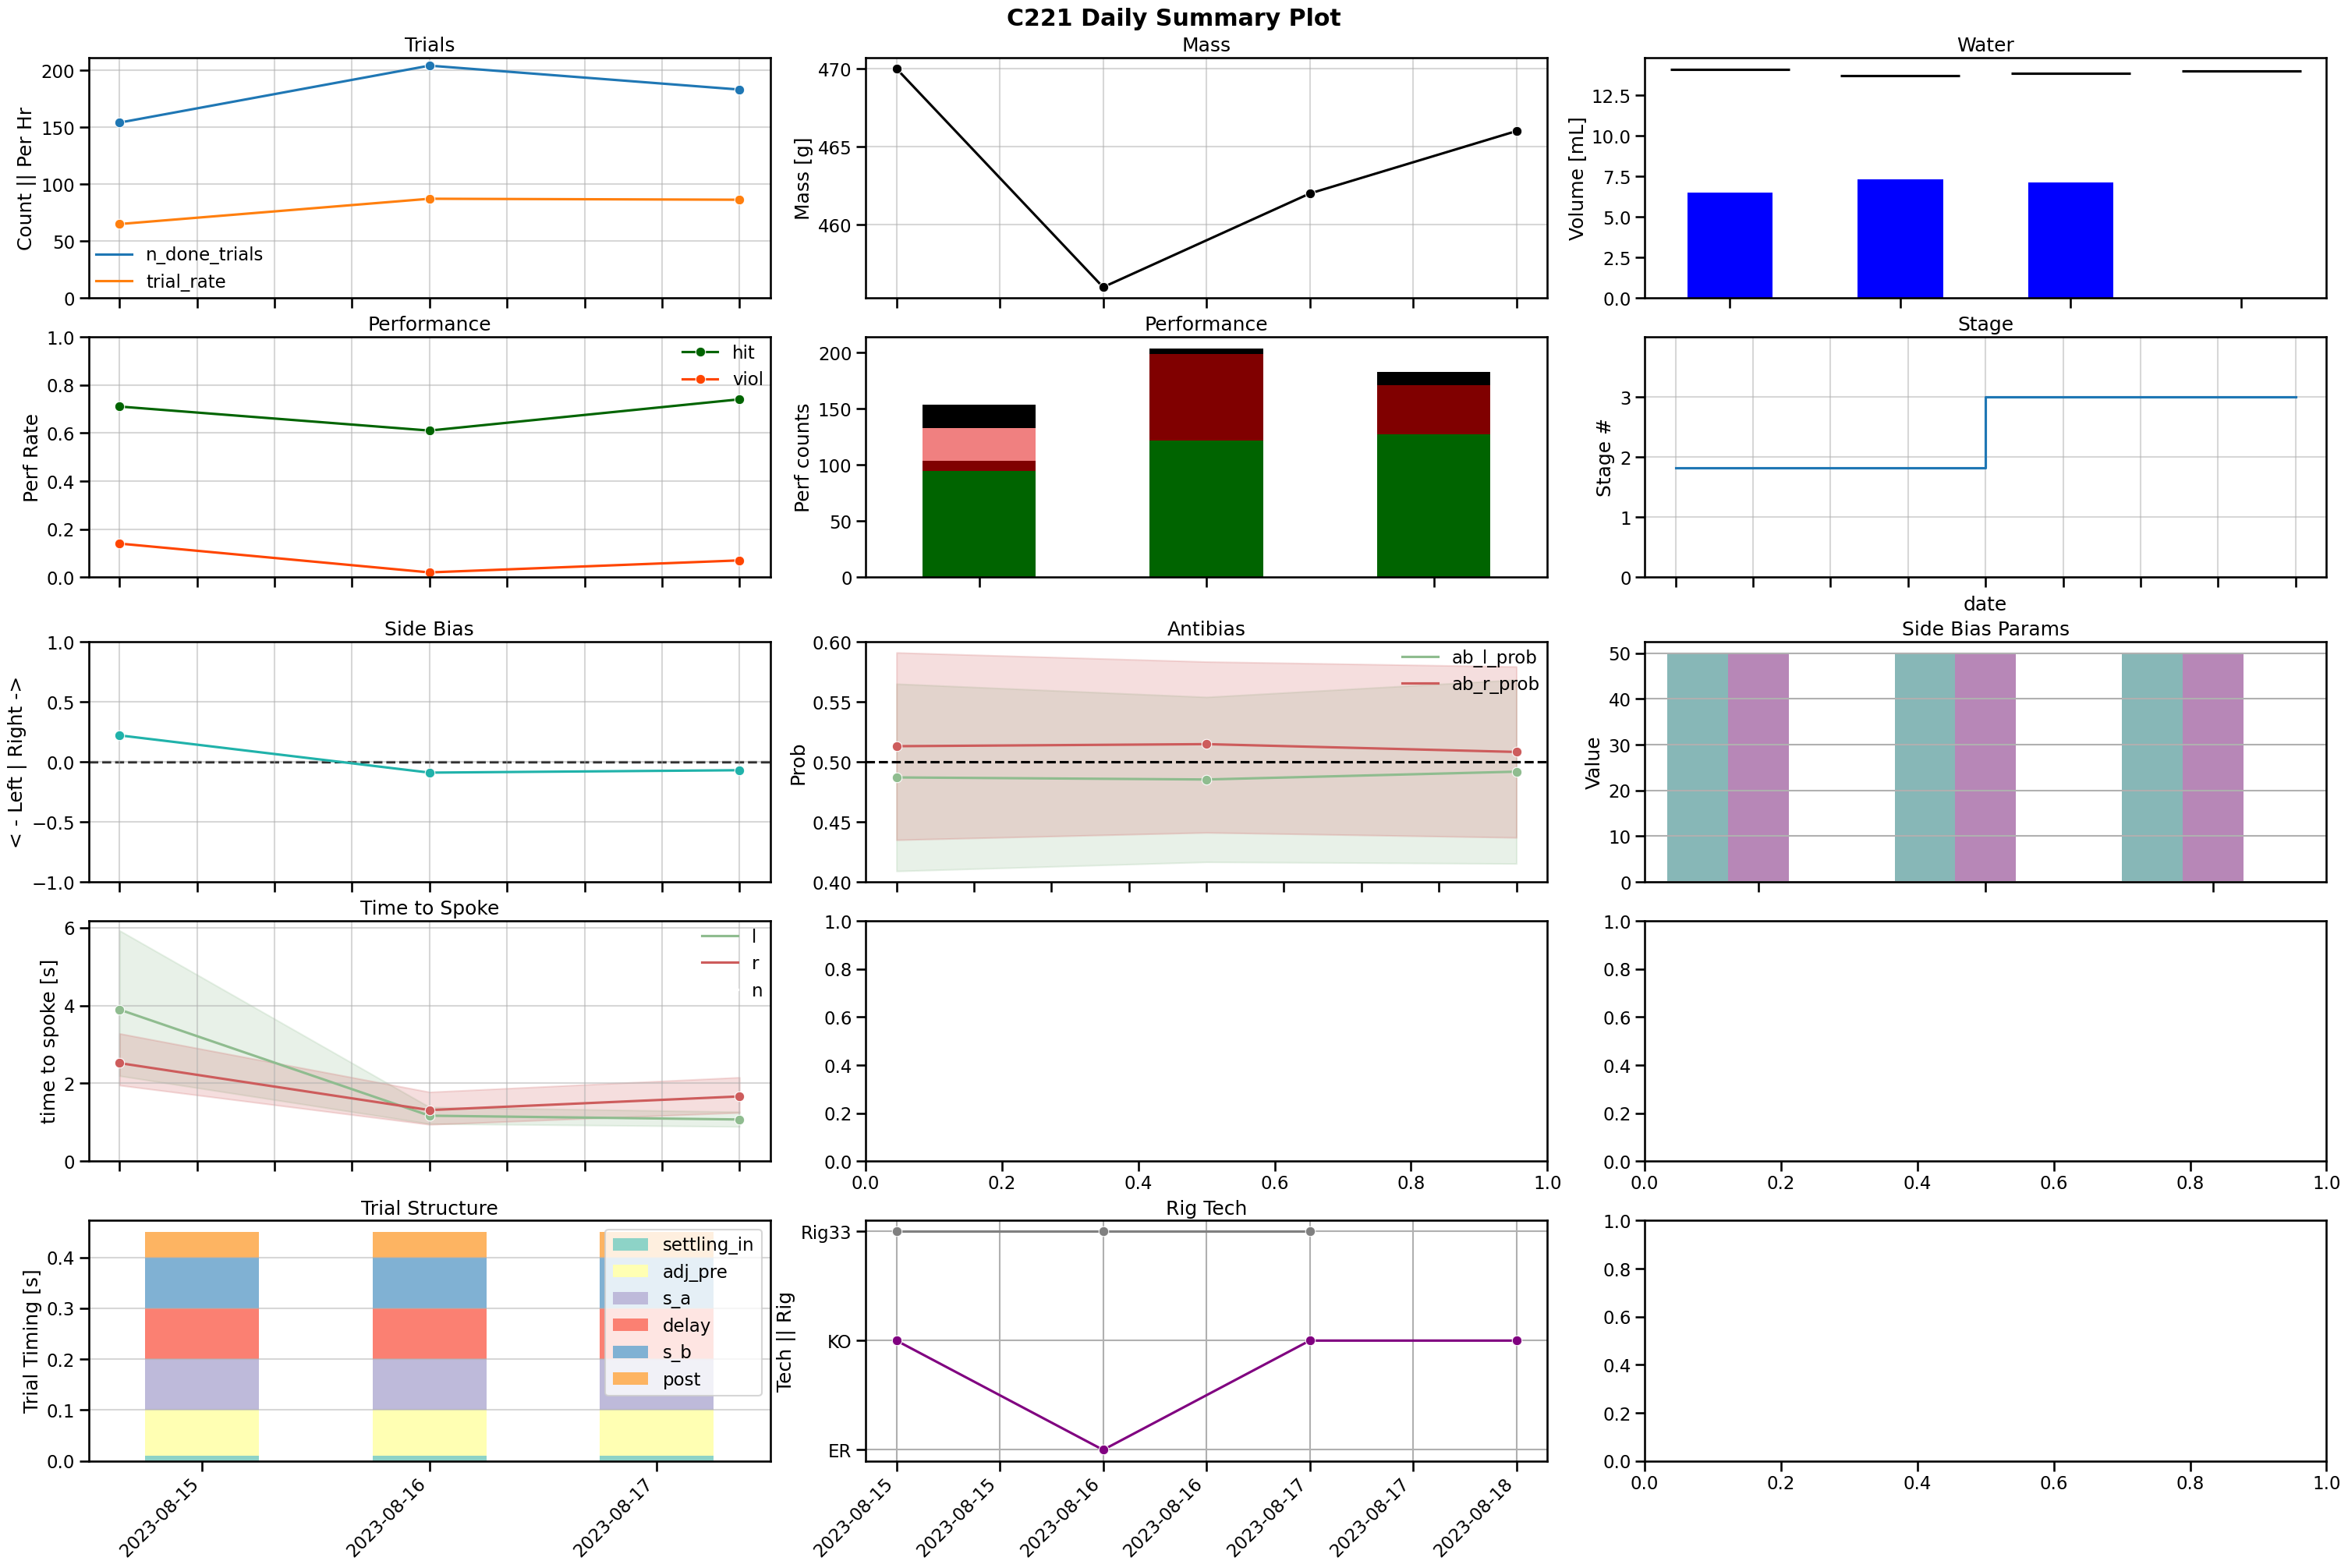

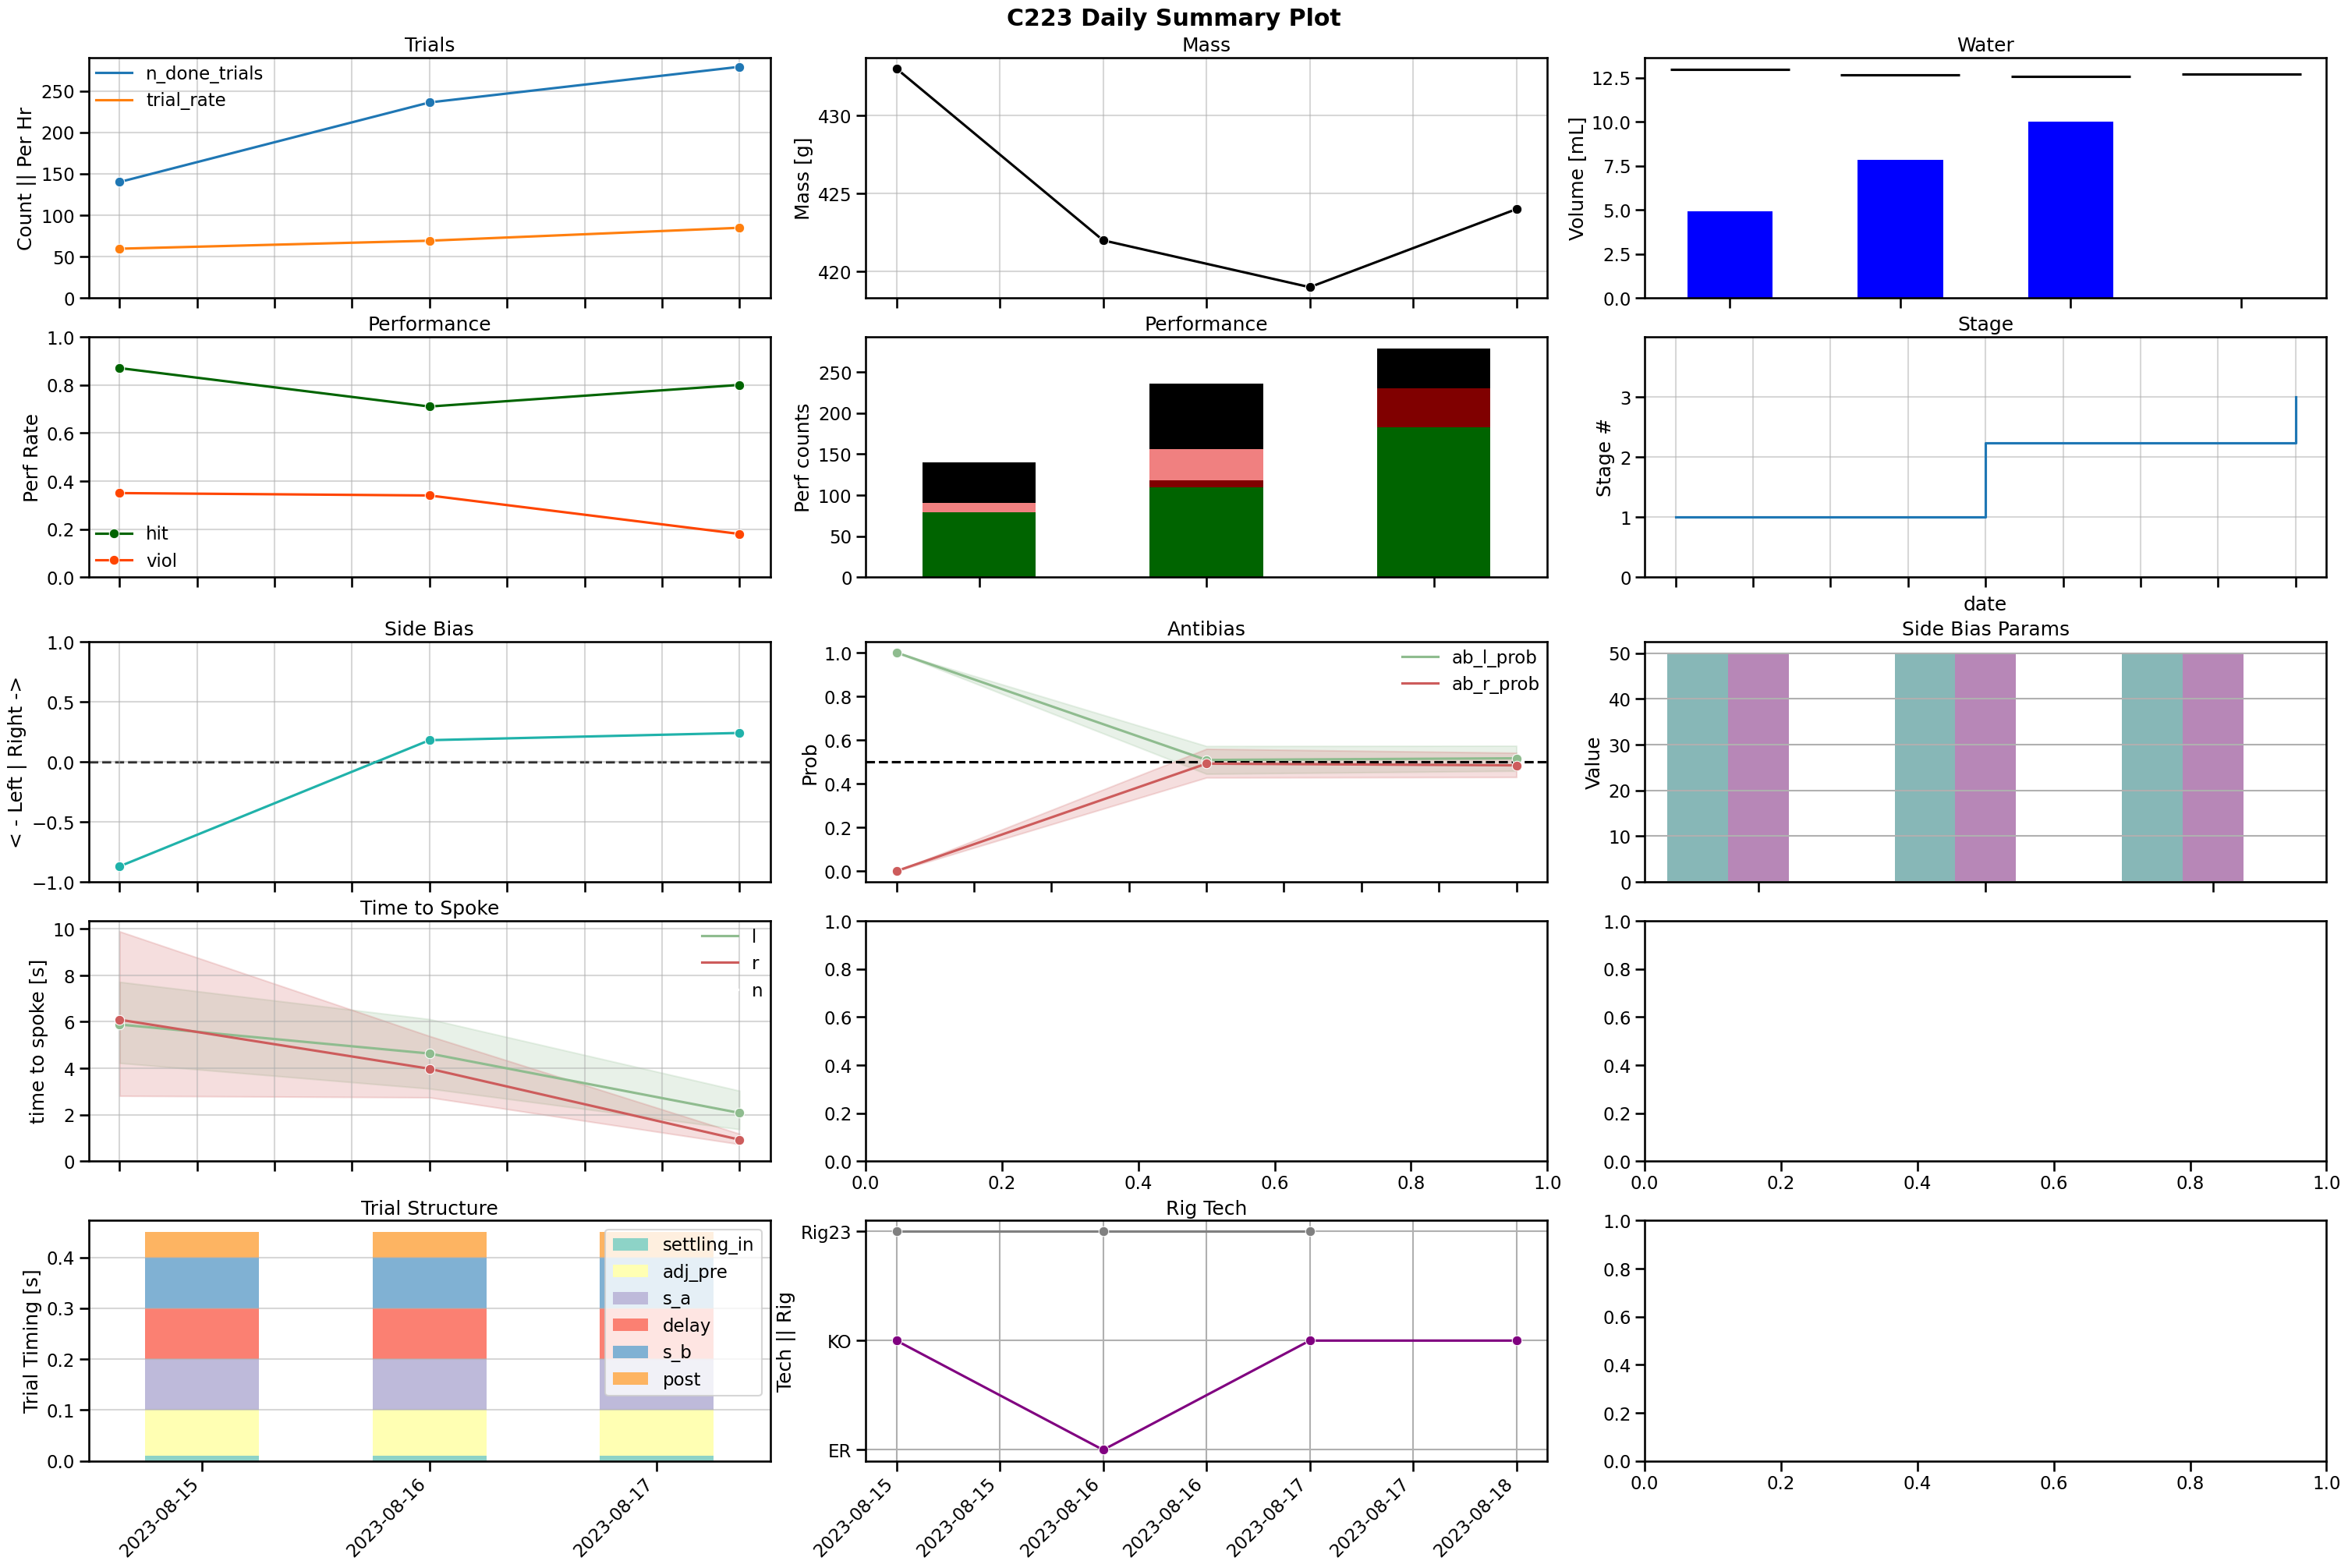

In [52]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)